In [ ]:
%pip install mglearn

X.shape: (26, 2)


d:\anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\Lib\site-packages\IPython\cor

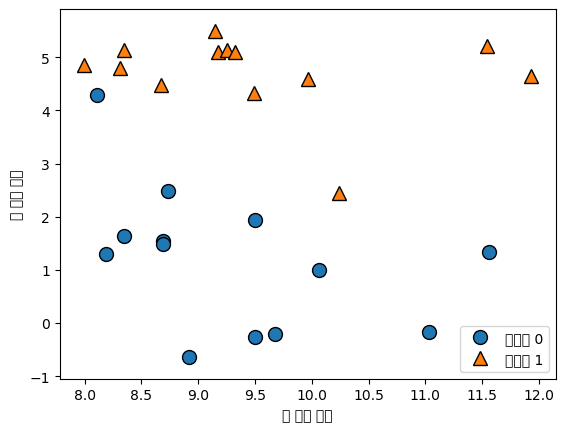

In [7]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# forge 데이터셋
# 인위적으로 만든 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

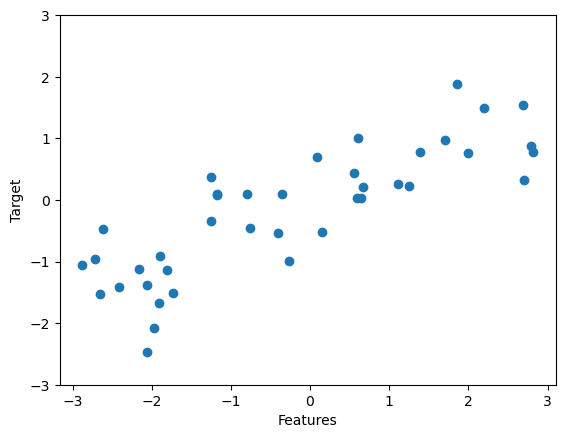

In [9]:
# wave 데이터셋
# 회귀 알고리즘에 사용

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Features")
plt.ylabel("Target")

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
# 569개의 데이터 포인트
# 30개의 특성

print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [14]:
# 569 개 데이터 포인터 중
# 212 개는 악성이고
# 357 개는 양성이다

print("클래스별 샘플 개수:\n", {
  n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [16]:
# feature_names 속성: 각 특성의 의미를 알 수 있다
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [21]:
# 보스턴 주택 가격 데이터셋
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("데이터의 형태:", data.shape)

# Output
# 데이터의 형태: (506, 13)

데이터의 형태: (506, 13)


In [22]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

# Output
# X.shape: (506, 104)

X.shape: (506, 104)


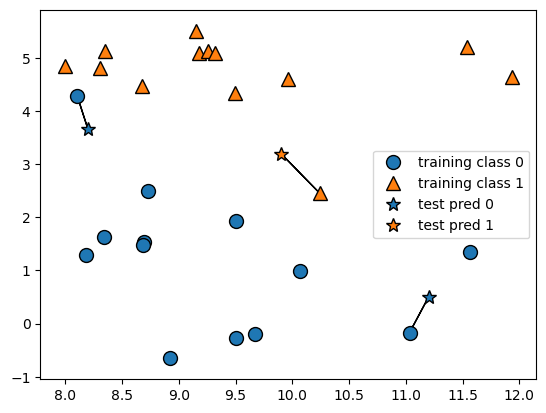

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

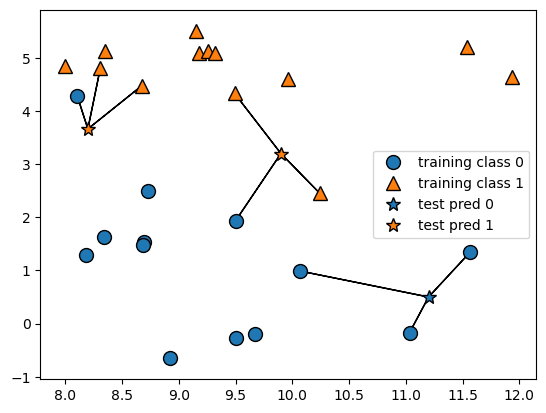

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [26]:
# 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# KNeighborsClassifier 클래스를 임포트하고 객체를 만든다
# 이웃의 수 같은 매개변수를 지정한다
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 훈련 세트를 사용하여 분류 모델을 학습시킨다
# KNeighborsClassifier 학습: 예측할 때 이웃을 찾을 수 있도록 데이터를 저장
clf.fit(X_train, y_train)

# 테스트 데이터에 대해 predict 메서드를 호출하여 예측한다
# 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 데이터를 찾는다
print("테스트 세트 예측:", clf.predict(X_test))
# Output
# 테스트 세트 예측: [1 0 1 0 1 0 0]

# 일반화 평가
# score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출한다
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))
# Output
# 테스트 세트 정확도: 0.86
# 86% 정확도; 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측하였다


테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


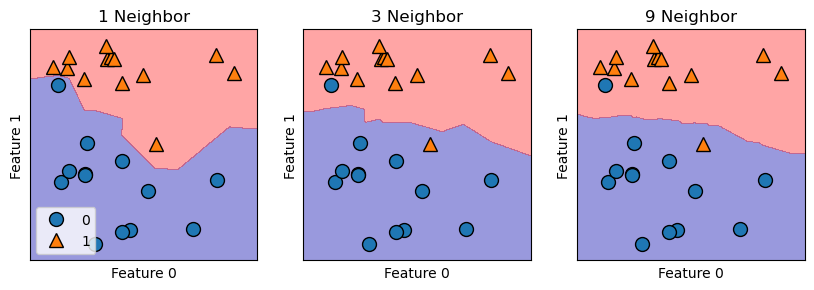

In [31]:
# Decision boundary
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit: sef 오브젝트를 리턴
  # 객체 생성과 fot 메서드를 한줄에 쓸 수 있다
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  # 결정 경계
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  # 분산도
  mglearn.discrete_scatter(X[:, 0],X[:,1], y,ax=ax)
  # 타이틀 & 레전드
  ax.set_title("{} Neighbor".format(n_neighbors))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend(loc=3)

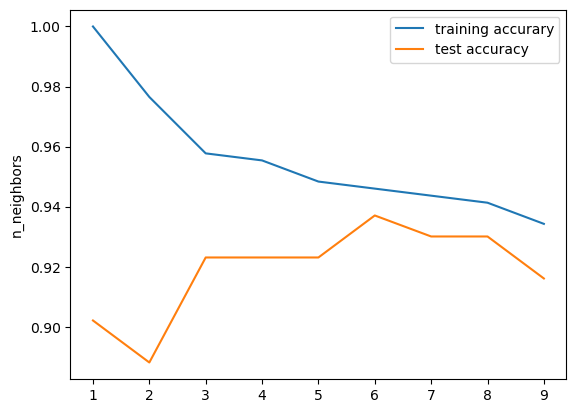

In [5]:
# 유방암 데이터셋을 사용하여 모델의 복잡도와 일반화 사이의 관계를 입증

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# stratify: 기존 데이터를 나누는 것에 그치는 게 아니라, 클래스 분포 비율까지 맞춰준다
# Stratified sampling: 훈련데이터를 나눌 때 무작위로 샘플링을 하되, 클래스 비율이 train, test 세트에도 동일하게 유지되는 것을 보장한다
# https://hyjykelly.tistory.com/44

training_accurary = []
test_accuracy = []

# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accurary.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accurary, label="training accurary")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accurary")
plt.ylabel("n_neighbors")
plt.legend()

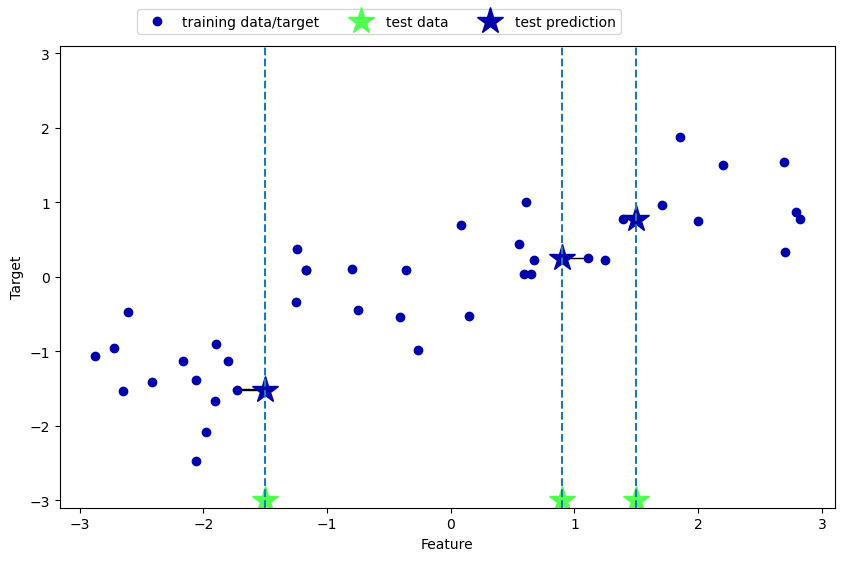

In [8]:
# wave 데이터셋에 대한 1-KNN 회귀 모델의 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

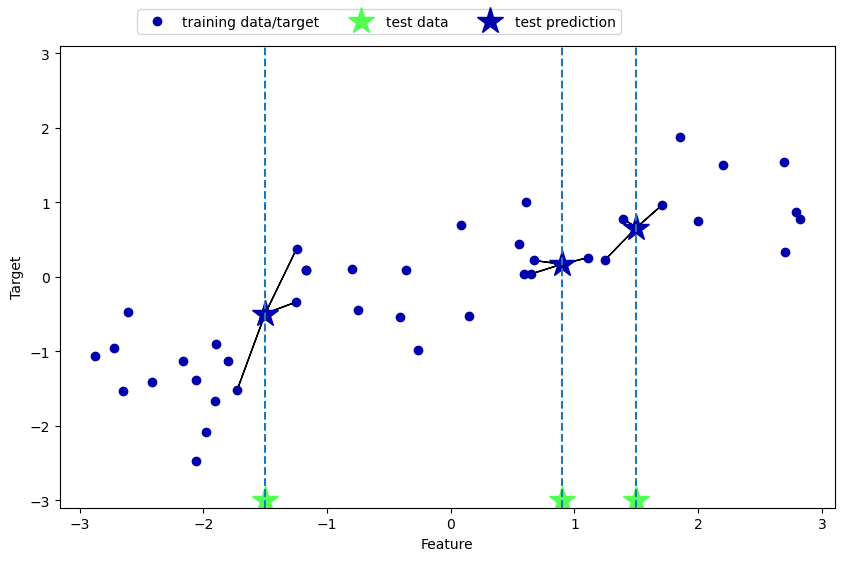

In [9]:
# wave 데이터셋에 대한 3-KNN 회귀 모델의 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [13]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다
reg.fit(X_train, y_train)

# 테스트 세트에 대해 예측을 한다
print("테스트 세트 예측:\n", reg.predict(X_test))

# Output
# 테스트 세트 예측:
# [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382  0.35686046  0.91241374 -0.44680446 -1.13881398]

# score 메서드를 사용하여 모델을 평가할 수 있다
# 회귀 일떄 R^2 를 반환 (0 ~ 1)
# 1: 예측이 완벽한 경우
# 0: 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델
# 음수: 예측과 타깃이 상반되는 경향을 가지는 경우
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

# Output
# 테스트 세트 R^2: 0.83

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


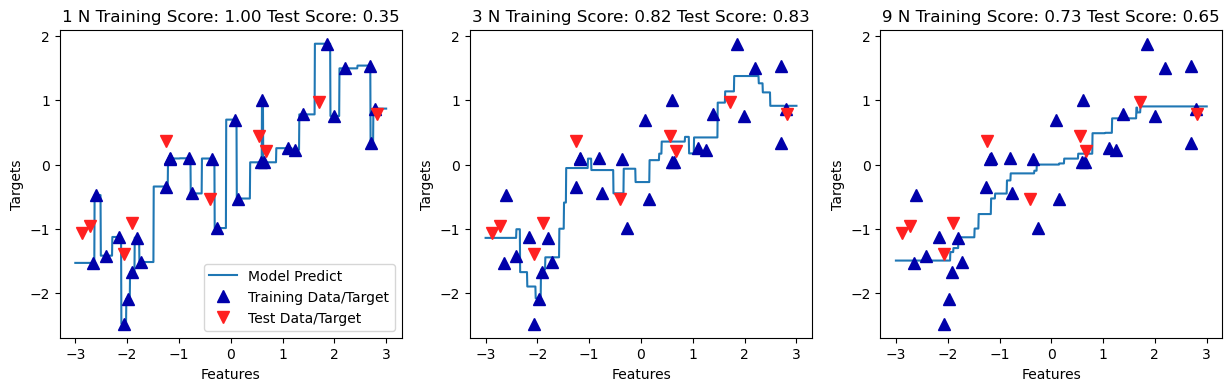

In [25]:
# KNeighborsRegressor 분석

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1000 개의 데이터 포인트를 만든다

line = np.linspace(-3, 3, 1000).reshape(-1,1)
# numpy.reshape
# Gives a new shape to an array without changing its data.

for n_neighbors, ax in zip([1,3,9], axes):
  # 1, 3, 9 이웃을 사용한 예측을 한다
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(
    "{} N Training Score: {:.2f} Test Score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))
  )

  ax.set_xlabel("Features")
  ax.set_ylabel("Targets")

axes[0].legend(["Model Predict", "Training Data/Target", "Test Data/Target"], loc="best")

w[0]: 0.393906  b: -0.031804


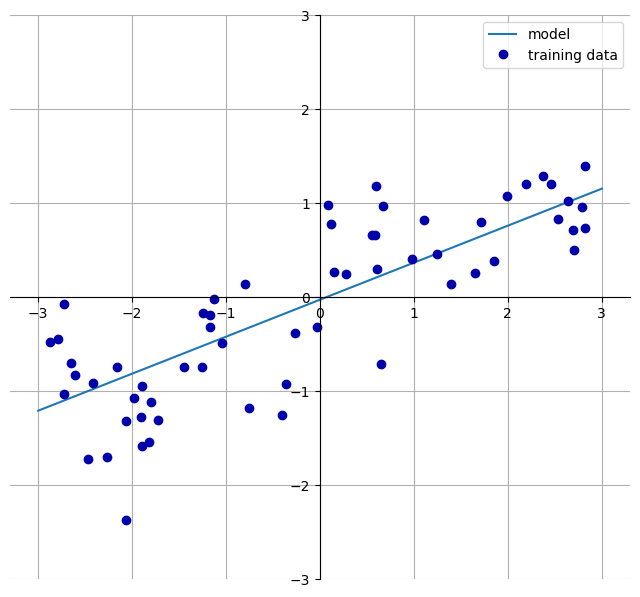

In [26]:
# wave 데이터셋을 사용하여 회귀 선형 모델 학습

mglearn.plots.plot_linear_regression_wave()

In [28]:
# 선형 모델

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

# w (weight/coefficient) = lr.coef_
# b (offset/intercept) = lr.intercept_

print("lr.coef_", lr.coef_)
print("lr.intercept_", lr.intercept_)

# output
# lr.coef_ [0.39390555]
# lr.intercept_ -0.031804343026759746

lr.coef_ [0.39390555]
lr.intercept_ -0.031804343026759746


In [29]:
# 훈련 세트와 테스트 세트의 성능 확인
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.67
# 테스트 세트 점수: 0.66

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [35]:
# 복잡한 데이터세트에서의 선형 회귀 모델

# 데이터셋 읽기
X, y = mglearn.datasets.load_extended_boston()

# 훈련/테스트 세트 스플릿
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 선형 모델 학습
lr = LinearRegression().fit(X_train, y_train)

# 점수 비교 (R^2)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.95
# 테스트 세트 점수: 0.61

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [38]:
# 보스턴 주택가격 데이터셋 + 리지 회귀(`linear_model.Ridge`)
from sklearn.linear_model import Ridge

# 리지 모델 학습
ridge = Ridge().fit(X_train, y_train)

# R^2 점수 조회
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.89
# 테스트 세트 점수: 0.75

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [39]:
# alpha 값이 10일 때 성능

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.79
# 테스트 세트 점수: 0.64

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [40]:
# alpha 값이 0.1일 때 성능

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

# Output
# 훈련 세트 점수: 0.93
# 테스트 세트 점수: 0.77

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


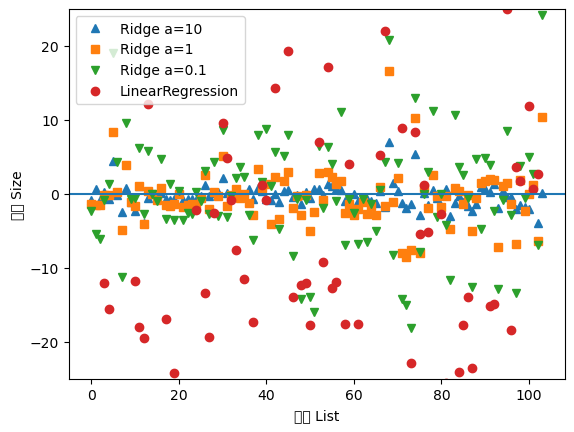

In [42]:
# a 크기에 따른 w(coef_) 값

plt.plot(ridge10.coef_, '^', label="Ridge a=10")
plt.plot(ridge.coef_, 's', label="Ridge a=1")
plt.plot(ridge01.coef_, 'v', label="Ridge a=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Size")

xlims = plt.xlim()

plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()